# Importing Libraries

In [12]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# EDA

# Loading Dataset

In [79]:
import os
import cv2
import numpy as np

# Define the path to mydataset
folder_path = "C:/Users/STAR/Downloads/archivee/images/"

# Define the emotions list
emotions = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]


# Initialize empty lists to store data and labels
data = []
labels = []

# Loop through "train" and "validation" folders
for folder_type in ["train", "validation"]:
    folder_type_path = os.path.join(folder_path, folder_type)

    # Loop through emotions
    for emotion in emotions:
        emotion_path = os.path.join(folder_type_path, emotion)
# Loop through image files
        for image_file in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, image_file)
            
            # Read image as grayscale
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Append image data and emotion label to lists
            data.append(img)
            labels.append(emotions.index(emotion))

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Displaying Images

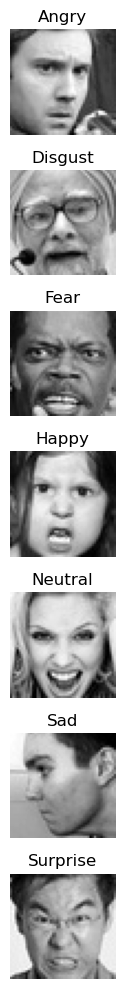

In [60]:
num_samples_per_class = 5  
plt.figure(figsize=(15, 10))

for emotion in emotions:
    emotion_indices = df[df['Emotion'] == emotion].index
    
    if len(emotion_indices) < num_samples_per_class:
        num_samples = len(emotion_indices)
    else:
        num_samples = num_samples_per_class
    
    random_indices = np.random.choice(emotion_indices, num_samples, replace=False)
    
    for i, index in enumerate(random_indices, 1):
        plt.subplot(len(emotions), num_samples_per_class, (emotions.index(emotion) * num_samples_per_class) + i)
        plt.imshow(data[index], cmap='gray')
        plt.title(emotion)
        plt.axis('off')

plt.tight_layout()
plt.show()

# Exploring the Dataset

In [62]:
# Total number of samples
total_samples = len(data)
print(f"Total number of samples: {total_samples}")

# Image dimensions
sample_image_shape = data[0].shape
print(f"Sample image shape: {sample_image_shape}")

# Data type
folder_type = data[0].dtype
print(f"Data type: {folder_type}")

Total number of samples: 35887
Sample image shape: (48, 48)
Data type: uint8


# Data Distribution & Plot

Number of images in each emotion category (Training Split):
    Emotion  Count
0     Angry   4953
1   Disgust    547
2      Fear   5121
3     Happy   8989
4   Neutral   6198
5       Sad   6077
6  Surprise   4002
Total number of images in the training split: 35887


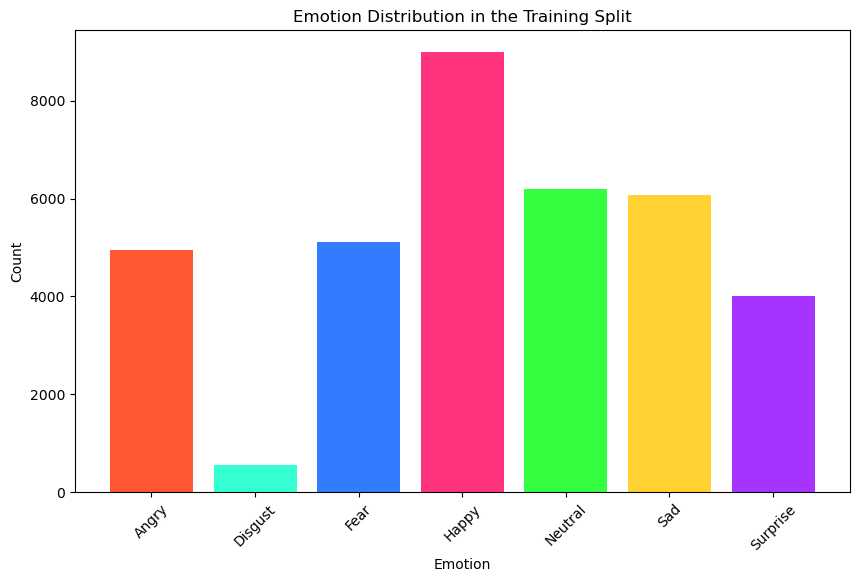

In [63]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the training split
train_path = os.path.join(dataset_path, "train")

# Initialize an empty dictionary to store the counts of each emotion
emotion_counts = {emotion: 0 for emotion in emotions}

# Loop through the labels (which are indices)
for label in labels:
    emotion = emotions[label]  # Get the corresponding emotion from the list
    emotion_counts[emotion] += 1

# Convert the counts dictionary to a pandas DataFrame
df = pd.DataFrame({'Emotion': list(emotion_counts.keys()), 'Count': list(emotion_counts.values())})

# Print the counts
print("Number of images in each emotion category (Training Split):")
print(df)

# Total number of images in the training split
total_images = df['Count'].sum()
print(f"Total number of images in the training split: {total_images}")

# Define a list of unique colors
unique_colors = ["#FF5733", "#33FFD1", "#337BFF", "#FF337E", "#33FF40", "#FFD133", "#A733FF"]

# Plot a bar chart of emotion distribution in the training split
plt.figure(figsize=(10, 6))
for idx, emotion in enumerate(df['Emotion']):
    plt.bar(emotion, df['Count'][idx], color=unique_colors[idx])

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Emotion Distribution in the Training Split')
plt.xticks(rotation=45)
plt.show()

# Validation Data

In [65]:
from keras.preprocessing.image import ImageDataGenerator

# Define the number of batch size and picture size
batch_size = 32
picture_size = 48

# Create a data generator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a data generator for validation/test set (without augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create training, validation, data generators
train_generator = train_datagen.flow_from_directory(
    folder_path + "train",
    target_size=(picture_size, picture_size),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    folder_path + "validation",
    target_size=(picture_size, picture_size),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Creating Model

In [66]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))  # Increased units for added complexity
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(128, activation='relu'))  # Another dense layer for added complexity
model.add(Dropout(0.3))  # Another dropout layer for added complexity
model.add(Dense(7, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

# Fitting the Model with Training and Validation Data

In [67]:
# Define the number of epochs and batch size
epochs = 15  # Increased number of epochs
batch_size = 64  # Increased batch size

# Fitting the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size 
)

Epoch 1/15
450/450 [==============================] - 200s 424ms/step - loss: 1.8266 - accuracy: 0.2422 - val_loss: 1.8228 - val_accuracy: 0.2491
Epoch 2/15
450/450 [==============================] - 201s 446ms/step - loss: 1.8095 - accuracy: 0.2476 - val_loss: 1.7585 - val_accuracy: 0.2801
Epoch 3/15
450/450 [==============================] - 185s 410ms/step - loss: 1.7692 - accuracy: 0.2655 - val_loss: 1.7181 - val_accuracy: 0.2895
Epoch 4/15
450/450 [==============================] - 201s 447ms/step - loss: 1.7500 - accuracy: 0.2807 - val_loss: 1.6956 - val_accuracy: 0.3159
Epoch 5/15
450/450 [==============================] - 199s 442ms/step - loss: 1.7364 - accuracy: 0.2845 - val_loss: 1.6513 - val_accuracy: 0.3398
Epoch 6/15
450/450 [==============================] - 195s 432ms/step - loss: 1.7119 - accuracy: 0.3022 - val_loss: 1.6005 - val_accuracy: 0.3741
Epoch 7/15
450/450 [==============================] - 200s 443ms/step - loss: 1.6701 - accuracy: 0.3237 - val_loss: 1.5982 -

In [74]:
# Evaluate the model on the validation data 
validation_loss, validation_accuracy = model.evaluate(val_generator, verbose=1)

# Print the validation loss and accuracy
print(f"Validation Loss: {validation_loss:.2f}")
print(f"Validation Accuracy: {validation_accuracy * 200:.2f}%")

221/221 [==============================] - 25s 113ms/step - loss: 1.3379 - accuracy: 0.4901
Validation Loss: 1.34
Validation Accuracy: 98.02%


# Plotting Accuracy & Loss

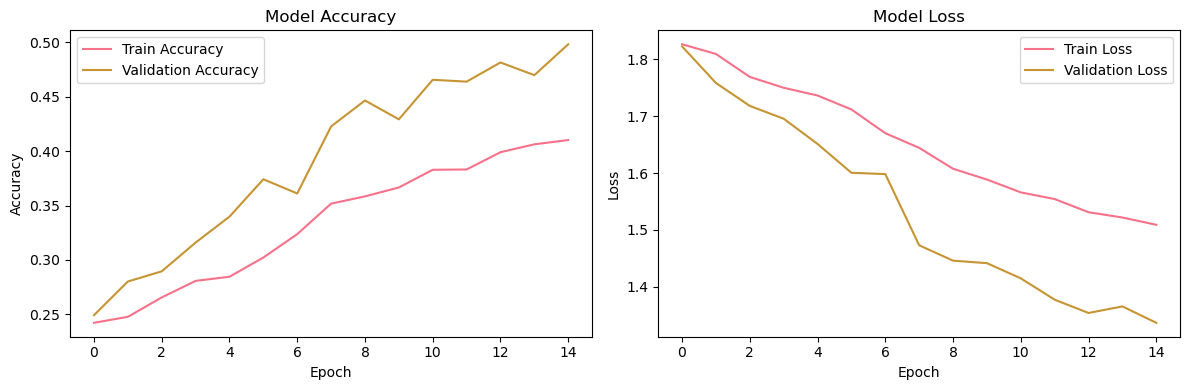

In [76]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [77]:
# Save the model
model.save("Model.keras")

In [78]:
from keras.models import load_model

# Load the saved model
loaded_model = load_model("Model.keras")